In [134]:
from __future__ import division
import pandas as pd
import numpy as np
import sys
import glob
import os.path
import re
import matplotlib.pyplot as plt

In [135]:
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [15,8]

In [136]:
productos = pd.read_pickle('productos_limpia')
materia = pd.read_pickle('materia_agregada')
productos = productos.loc[productos['ANIO'] == '2018']

In [137]:
productos.head()

,PRODUCTO,CARGA,EXISTENCIA,DEVOLUCION,VENTA TOTAL,PRECIO * PRODUC,$,VENTA EN LT,RUTA,DIA,SEMANA,ANIO
12029,PRODUCTO10,NaN,NaN,0,0.0,7.5,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2018
12030,Queso Hebra,NaN,NaN,0,0.0,60,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2018
12031,Queso fresco,NaN,0,0,0.0,12,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2018
12032,Queso añejo,NaN,0,0,0.0,55,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2018
12033,Queso panela,NaN,0,0,0.0,50,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2018


In [138]:
materia.head()

,M,T,M.1,T.1,M.2,T.2,M.3,T.3,M.4,M.5,...,T.8,M.10,M.11,T.9,M.12,T.10,M.13,T.11,SUMA,NUM_DIA
0,36.0,0.0,17.0,42.0,50.5,30.0,14.0,16.0,10.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1492.0,0
1,40.0,0.0,16.0,44.0,50.0,24.5,14.0,16.0,16.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1533.0,1
2,36.0,0.0,15.0,37.5,53.5,31.5,14.0,21.0,10.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1605.0,2
3,32.0,0.0,15.0,35.0,49.0,31.0,14.0,16.0,6.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1587.0,3
4,35.5,0.0,14.0,40.0,56.0,33.0,13.0,16.0,6.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1520.0,4


In [139]:
#Comparar el total de materia prima que “entra” al inicio de cada año, contra la que “sale”
#en forma de producto vendido por semana para todo el año (en el periodo de datos
#disponibles)

total_entrada = materia['SUMA'].sum()
total_salida = productos['VENTA TOTAL'].sum()
ratio = total_salida / total_entrada

In [140]:
total_entrada

1134560.7

In [141]:
total_salida

126815.2

In [142]:
ratio

0.11177471597597202

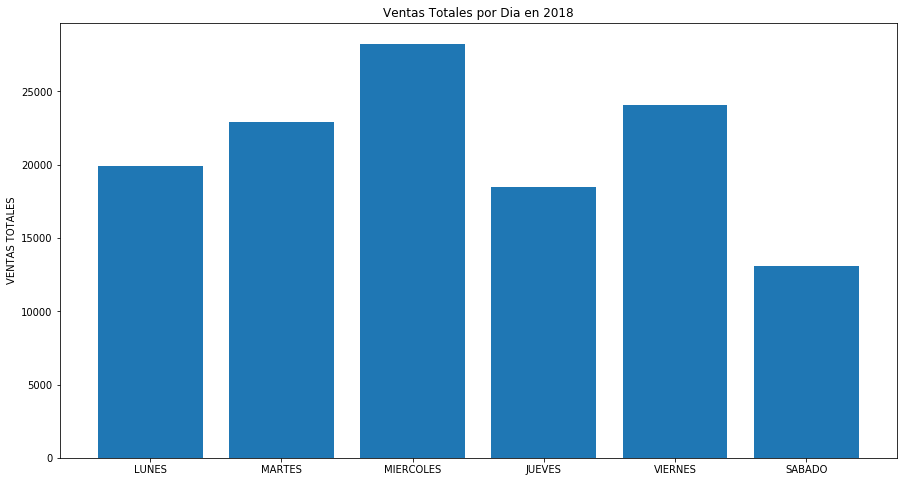

In [143]:
# Cómo varía cada una de estas cantidades por días, semanas y meses.

# SOLO DIAS

dias = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
ventas = []
for dia in dias:
    ventas_count = pd.to_numeric(productos.loc[productos['DIA'] == dia]['VENTA TOTAL'], errors = 'coerce').sum()
    ventas.append(ventas_count)
plt.bar(dias, ventas)
plt.title('Ventas Totales por Dia en 2018')
plt.ylabel('VENTAS TOTALES')
plt.show()

In [144]:
folder_name = "./data_4/"

data_path = os.path.join(folder_name,'*csv')

files = glob.glob(data_path)
files

file = files[0]
materia_prima = pd.read_csv(file)
materia_prima = materia_prima.fillna(0)
materia_prima=materia_prima[materia_prima.DIA != 'DIA']
materia_prima.head()

materia_dias = list(materia_prima.iloc[:,0])

for i in range(len(materia_dias)):
    if materia_dias[i] == 'S':
        materia_dias[i] = 'SABADO'
    if materia_dias[i] == 'D':
        materia_dias[i] = 'DOMINGO'
    if materia_dias[i] == 'L':
        materia_dias[i] = 'LUNES'
    if materia_dias[i] == 'M':
        if materia_dias[i - 1] == 'LUNES':
            materia_dias[i] = 'MARTES'
        else:
            materia_dias[i] = 'MIERCOLES'
    if materia_dias[i] == 'J':
        materia_dias[i] = 'JUEVES'
    if materia_dias[i] == 'V':
        materia_dias[i] = 'VIERNES'
        

materia['DIA'] = materia_dias

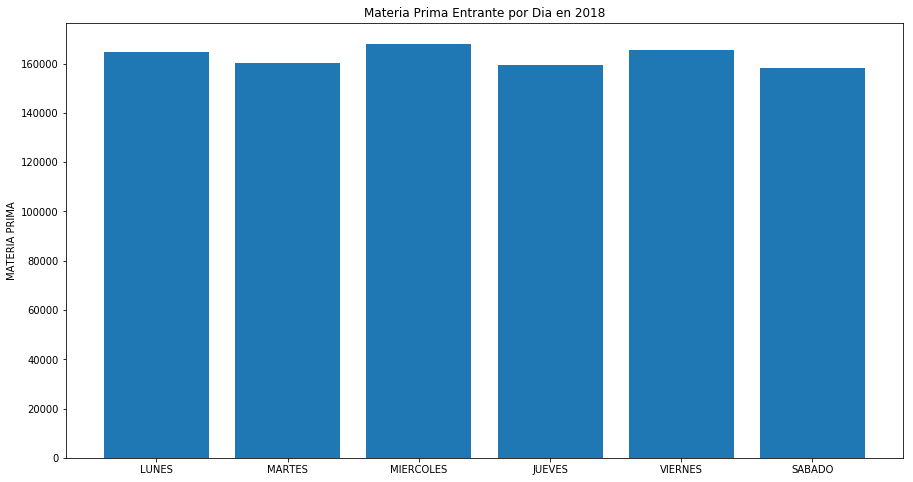

In [145]:
dias = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SABADO']
materia_entrante = []
for dia in dias:
    materia_entrante_count = materia.loc[materia['DIA'] == dia]['SUMA'].sum()
    materia_entrante.append(materia_entrante_count)
plt.bar(dias, materia_entrante)
plt.title('Materia Prima Entrante por Dia en 2018')
plt.ylabel('MATERIA PRIMA')
plt.show()

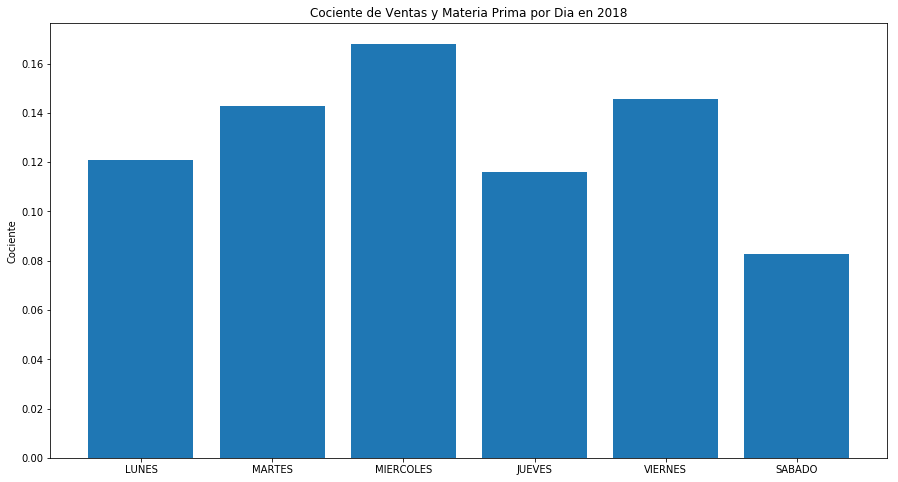

In [146]:
ratio_por_dia = [ventas[i]/ materia_entrante[i] for i in range(len(ventas))]
ratio_por_dia
plt.bar(dias, ratio_por_dia)
plt.title('Cociente de Ventas y Materia Prima por Dia en 2018')
plt.ylabel('Cociente')
plt.show()

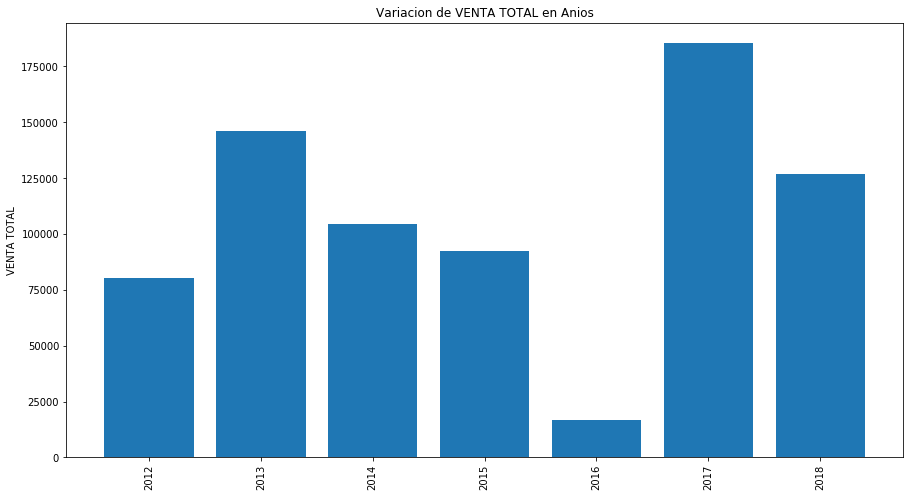

In [147]:
# Finalmente, generar un modelo de predicción que permita proyectar la venta total de
# productos para las semanas finales de 2018, tomando en cuenta los gastos de producción.

productos = pd.read_pickle('productos_limpia')

anios = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
count_anios = []
for anio in anios:
    filter_aux = productos.loc[productos['ANIO'] == anio]
    count = pd.to_numeric(filter_aux['VENTA TOTAL'], errors = 'coerce').sum()
    count_anios.append(count)

plt.bar(anios, count_anios)
plt.xticks(rotation=90)
plt.title('Variacion de VENTA TOTAL en Anios')
plt.ylabel('VENTA TOTAL')
plt.show()

In [148]:
productos = pd.read_pickle('productos_limpia')
productos = productos.loc[productos['SEMANA'].str.contains('1 ENERO')|
							productos['SEMANA'].str.contains('2 ENERO')|
							productos['SEMANA'].str.contains('3 ENERO')|
							productos['SEMANA'].str.contains('4 ENERO')|
							productos['SEMANA'].str.contains('1 FEBRERO')|
							productos['SEMANA'].str.contains('2 FEBRERO')|
							productos['SEMANA'].str.contains('3 FEBRERO')|
							productos['SEMANA'].str.contains('4 FEBRERO')|
							productos['SEMANA'].str.contains('1 MARZO')|
							productos['SEMANA'].str.contains('2 MARZO')|
							productos['SEMANA'].str.contains('3 MARZO')|
							productos['SEMANA'].str.contains('4 MARZO')|
							productos['SEMANA'].str.contains('1 ABRIL')|
							productos['SEMANA'].str.contains('2 ABRIL')|
							productos['SEMANA'].str.contains('3 ABRIL')|
							productos['SEMANA'].str.contains('4 ABRIL')|
							productos['SEMANA'].str.contains('1 MAYO')|
							productos['SEMANA'].str.contains('2 MAYO')|
							productos['SEMANA'].str.contains('3 MAYO')|
							productos['SEMANA'].str.contains('4 MAYO')|
							productos['SEMANA'].str.contains('1 JUNIO')|
							productos['SEMANA'].str.contains('2 JUNIO')|
							productos['SEMANA'].str.contains('3 JUNIO')|
							productos['SEMANA'].str.contains('4 JUNIO')|
							productos['SEMANA'].str.contains('1 JULIO')|
							productos['SEMANA'].str.contains('2 JULIO')|
							productos['SEMANA'].str.contains('3 JULIO')|
							productos['SEMANA'].str.contains('4 JULIO')|
							productos['SEMANA'].str.contains('1 AGOSTO')|
							productos['SEMANA'].str.contains('2 AGOSTO')|
							productos['SEMANA'].str.contains('3 AGOSTO')|
							productos['SEMANA'].str.contains('4 AGOSTO')|
							productos['SEMANA'].str.contains('1 SEPTIEMBRE')|
							productos['SEMANA'].str.contains('2 SEPTIEMBRE')|
							productos['SEMANA'].str.contains('3 SEPTIEMBRE')|
							productos['SEMANA'].str.contains('4 SEPTIEMBRE')|
							productos['SEMANA'].str.contains('1 OCTUBRE')|
							productos['SEMANA'].str.contains('2 OCTUBRE')|
							productos['SEMANA'].str.contains('3 OCTUBRE')|
							productos['SEMANA'].str.contains('4 OCTUBRE')|
							productos['SEMANA'].str.contains('1 NOVIEMBRE')|
							productos['SEMANA'].str.contains('2 NOVIEMBRE')|
							productos['SEMANA'].str.contains('3 NOVIEMBRE')|
							productos['SEMANA'].str.contains('4 NOVIEMBRE')|
							productos['SEMANA'].str.contains('1 DICIEMBRE')|
							productos['SEMANA'].str.contains('2 DICIEMBRE')|
							productos['SEMANA'].str.contains('3 DICIEMBRE')|
							productos['SEMANA'].str.contains('4 DICIEMBRE')]
productos['SEMANA'].index = productos['SEMANA'].index.map(str)
semanas_list = productos['SEMANA']
dims = productos.shape
meses = []
for i in range(dims[0]):
    if 'ENERO' in str(semanas_list[i]):
        mes_aux = 'ENERO'
        meses.append(mes_aux)
    if 'FEBRERO' in str(semanas_list[i]):
        mes_aux = 'FEBRERO'
        meses.append(mes_aux)
    if 'MARZO' in str(semanas_list[i]):
        mes_aux = 'MARZO'
        meses.append(mes_aux)
    if 'ABRIL' in str(semanas_list[i]):
        mes_aux = 'ABRIL'
        meses.append(mes_aux)
    if 'MAYO' in str(semanas_list[i]):
        mes_aux = 'MAYO'
        meses.append(mes_aux)
    if 'JUNIO' in str(semanas_list[i]):
        mes_aux = 'JUNIO'
        meses.append(mes_aux)
    if 'JULIO' in str(semanas_list[i]):
        mes_aux = 'JULIO'
        meses.append(mes_aux)
    if 'AGOSTO' in str(semanas_list[i]):
        mes_aux = 'AGOSTO'
        meses.append(mes_aux)
    if 'SEPTIEMBRE' in str(semanas_list[i]):
        mes_aux = 'SEPTIEMBRE'
        meses.append(mes_aux)
    if 'OCTUBRE' in str(semanas_list[i]):
        mes_aux = 'OCTUBRE' 
        meses.append(mes_aux)
    if 'NOVIEMBRE' in str(semanas_list[i]):
        mes_aux = 'NOVIEMBRE'
        meses.append(mes_aux)
    if 'DICIEMBRE' in str(semanas_list[i]):
        mes_aux = 'DICIEMBRE'
        meses.append(mes_aux)
productos['MES'] = meses
productos.head()

,PRODUCTO,CARGA,EXISTENCIA,DEVOLUCION,VENTA TOTAL,PRECIO * PRODUC,$,VENTA EN LT,RUTA,DIA,SEMANA,ANIO,MES
0,PRODUCTO10,NaN,NaN,0,0.0,7.5,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017,AGOSTO
1,Queso Hebra,NaN,NaN,0,0.0,60,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017,AGOSTO
2,Queso fresco,NaN,0,0,0.0,12,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017,AGOSTO
3,Queso añejo,NaN,0,0,0.0,55,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017,AGOSTO
4,Queso panela,NaN,0,0,0.0,50,0.0,0.0,RUTA: SAN MARCOS,LUNES,4 AGOSTO,2017,AGOSTO


In [149]:
anios = ['2012', '2013', '2014', '2015', '2016', '2017']
ventas_comparables = []
for anio in anios:
    filter_aux = productos.loc[productos['ANIO'] == anio]
    filter_aux = filter_aux.loc[filter_aux['MES'] != 'NOVIEMBRE']
    filter_aux = filter_aux.loc[filter_aux['MES'] != 'DICIEMBRE']
    count = pd.to_numeric(filter_aux['VENTA TOTAL'], errors = 'coerce').sum()
    ventas_comparables.append(count)

#plt.bar(anios, ventas_comparables)
#plt.xticks(rotation=90)
#plt.title('VENTA TOTAL Antes de Octubre en Anios')
#plt.ylabel('VENTA TOTAL')
#plt.show()

In [154]:
ventas_totales = count_anios[0:len(count_anios) - 1]
ventas_parciales = ventas_comparables
ratio = [ventas_parciales[i]/ ventas_totales[i] for i in range(len(ventas_parciales))]

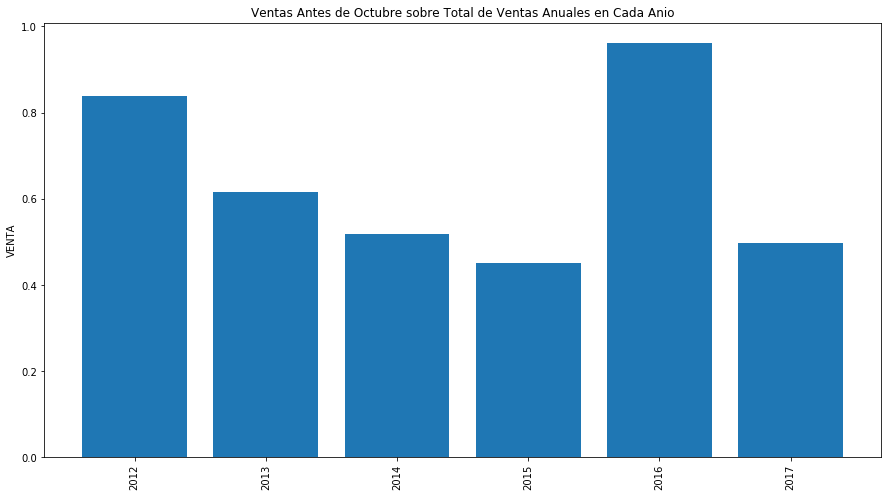

In [153]:
plt.bar(anios, ratio)
plt.xticks(rotation=90)
plt.title('Ventas Antes de Octubre sobre Total de Ventas Anuales en Cada Anio')
plt.ylabel('VENTA')
plt.show()

In [180]:
# Conservadora
current = count_anios[-1]
average_prop = np.mean(ratio[0:3])
print(average_prop)
prediction_1 = current / average_prop
# Optimista
current = count_anios[-1]
average_prop = .4
prediction_2 = current / average_prop


0.6579573758714091


In [181]:
current

126815.2

In [182]:
prediction_1

192740.7528976234

In [183]:
(prediction_1 - current) / current

0.5198552925644828

In [184]:
prediction_2

317038.0

In [185]:
(prediction_2 - current) / current

1.5